In [1]:
import astropy
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import photutils
from util import show_imstat, plot_line, plot_zscale_image, overscan_subs_trim

import numpy as np

from astropy.visualization import ZScaleInterval
from astropy import stats as astrostats

import scipy
import scipy.stats as scistats

# Check Bias

In [2]:
# bias is 93 - 111
hdu = fits.open("../Imaging/a095.fits")

In [3]:
print(hdu.info(), hdu[0].data.shape)
# Dimensions here = (column, row)
# shape = (row, column)

Filename: ../Imaging/a095.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (2200, 2048)   int16 (rescales to uint16)   
None (2048, 2200)


In [4]:
zscale = ZScaleInterval()

In [5]:
vmin, vmax = zscale.get_limits(hdu[0].data)

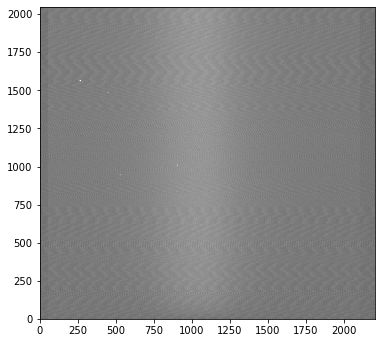

In [6]:
plt.figure(figsize=(6, 6))
plt.imshow(hdu[0].data, cmap='gray', vmin=vmin, vmax=vmax, origin='lower')

In [7]:
print(hdu[0].data.shape)

(2048, 2200)


(2048,)
Mean: 662.13671875 Std: 8.79824086726423 Median: 662.0 RMS: 204.60313624032014 Min: 598 Max: 711


<Figure size 576x432 with 0 Axes>

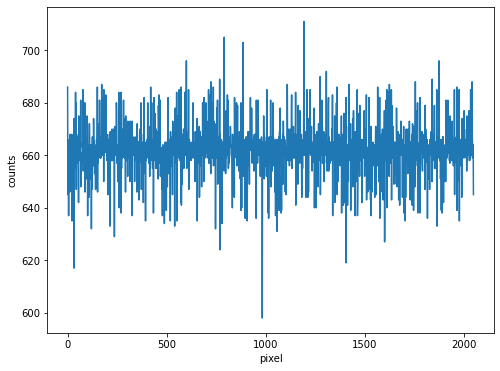

In [8]:
# show a column, should have 2048 rows
print(hdu[0].data[:, 0].shape)
show_imstat(hdu[0].data[:, 0])
plt.figure(figsize=(8, 6))
plot_line(hdu[0].data[:, 0])

(2200,)
Mean: 659.165909090909 Std: 8.733697623203685 Median: 659.0 RMS: 197.6517472268287 Min: 612 Max: 703


<Figure size 576x432 with 0 Axes>

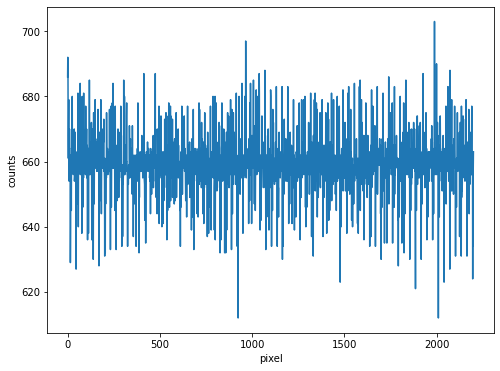

In [9]:
# show a row, should have 2200 columns
print(hdu[0].data[0, :].shape)
show_imstat(hdu[0].data[0, :])
plt.figure(figsize=(8, 6))
plot_line(hdu[0].data[0, :])

(2048,)
Mean: 662.416015625 Std: 8.406004721314154 Median: 663.0 RMS: 205.7222366976283 Min: 621 Max: 697


<Figure size 576x432 with 0 Axes>

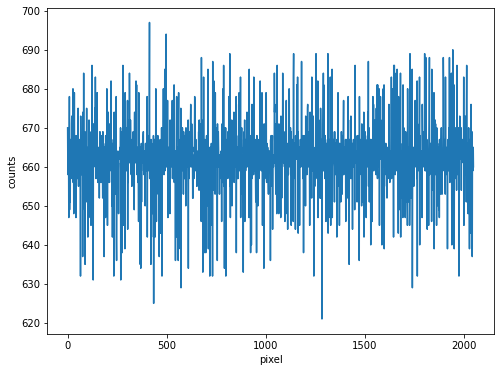

In [10]:
# show a column, should have 2048 rows
print(hdu[0].data[:, 10].shape)
show_imstat(hdu[0].data[:, 10])
plt.figure(figsize=(8, 6))
plot_line(hdu[0].data[:, 10])

(10, 10)
Mean: 663.67 Std: 6.879033362326424 Median: 662.0 RMS: 205.05196902248952 Min: 641 Max: 682


<Figure size 576x432 with 0 Axes>

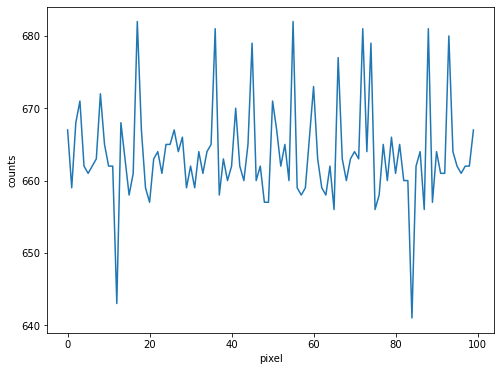

In [11]:
# show a region
print(hdu[0].data[15:25, 10:20].shape)
show_imstat(hdu[0].data[15:25, 10:20])
plt.figure(figsize=(8, 6))
plot_line(hdu[0].data[15:25, 10:20])

# Compare all bias exposures throughout the night
bias is a93 - a111

In [12]:
# not significant difference across images
for i in range(95, 112):
    print(f"Image: a{i:0>3}.fits")
    hdu = fits.open(f"../Imaging/a{i:0>3}.fits")
    show_imstat(hdu[0].data)
    hdu.close()

Image: a095.fits
Mean: 665.5575142045454 Std: 8.92654707214331 Median: 665.0 RMS: 212.47162110490598 Min: 587 Max: 1653
Image: a096.fits
Mean: 665.671338112571 Std: 8.91783019372463 Median: 666.0 RMS: 212.69487297308288 Min: 579 Max: 1473
Image: a097.fits
Mean: 665.6596943803268 Std: 9.15360021262778 Median: 666.0 RMS: 212.66594981395508 Min: 587 Max: 3757
Image: a098.fits
Mean: 665.6369082919034 Std: 8.912341960236885 Median: 665.0 RMS: 212.656196864974 Min: 587 Max: 1268
Image: a099.fits
Mean: 665.590732421875 Std: 8.909404771987573 Median: 665.0 RMS: 212.54075253553148 Min: 567 Max: 1499
Image: a100.fits
Mean: 665.5508478338069 Std: 8.941481808818256 Median: 665.0 RMS: 212.475806674463 Min: 586 Max: 1998
Image: a101.fits
Mean: 665.576504350142 Std: 8.907702048491156 Median: 665.0 RMS: 212.5182972413804 Min: 586 Max: 1190
Image: a102.fits
Mean: 665.5441748046875 Std: 9.060101241508017 Median: 665.0 RMS: 212.4424359595167 Min: 571 Max: 2945
Image: a103.fits
Mean: 665.5616748046875 Std

# Open a random image and read overscan region to compare

In [13]:
arr_mean = []
arr_std = []
arr_median = []
for i in range(130, 220, 2):
    try:
        hdu = fits.open(f"../Imaging/a{i}.fits")
    except FileNotFoundError:
        print(f"File not found: a{i}.fits")
        continue
    imdata = hdu[0].data
    overscan = (imdata < 720)
    mean, std, median = show_imstat(imdata[overscan])
    arr_mean.append(mean)
    arr_std.append(std)
    arr_median.append(median)
    hdu.close()
# There is a difference between the overscan region and the bias, 
# about 30 counts different. 

Mean: 685.8048562852238 Std: 11.79019953775911 Median: 687.0 RMS: 148.65318632251206 Min: 0 Max: 719
Mean: 684.8884568875751 Std: 26.913877305515058 Median: 677.0 RMS: 210.14001394151384 Min: 0 Max: 719
Mean: 705.0224818941103 Std: 17.623477322086334 Median: 711.0 RMS: 213.58561990098312 Min: 0 Max: 719
Mean: 663.2403281540729 Std: 15.265915813998378 Median: 661.0 RMS: 202.4678506219829 Min: 0 Max: 719
Mean: 659.3927057236461 Std: 8.562911287429182 Median: 660.0 RMS: 199.58141842480893 Min: 0 Max: 718
File not found: a140.fits
Mean: 662.0854958721782 Std: 8.562793654216714 Median: 662.0 RMS: 205.54012308127668 Min: 0 Max: 719
Mean: 660.5558236870105 Std: 9.024682427655543 Median: 661.0 RMS: 201.8545888553994 Min: 0 Max: 719
Mean: 662.7221840306332 Std: 8.577522178556977 Median: 663.0 RMS: 206.45109969854929 Min: 0 Max: 719
Mean: 661.6407531584998 Std: 8.777371964900746 Median: 662.0 RMS: 204.21562360126515 Min: 0 Max: 719
Mean: 705.0177774940342 Std: 18.159298041346077 Median: 712.0 RM

In [14]:
print(arr_mean, arr_std, arr_median)
print(np.mean(arr_mean), np.mean(arr_median))
# There is a difference between the overscan region and the bias, 
# about 10 - 30 counts different. 
# the average tells us abot 10 counts different from bias
# so the masterbias can be a good estimate

[685.8048562852238, 684.8884568875751, 705.0224818941103, 663.2403281540729, 659.3927057236461, 662.0854958721782, 660.5558236870105, 662.7221840306332, 661.6407531584998, 705.0177774940342, 660.072304905544, 678.1891773527716, 700.7148177752559, 698.6394572103421, 674.8828824441397, 663.4370963649968, 701.1690851082835, 699.7818723774744, 699.7174301818093, 661.813379819498, 672.5655695734797, 672.2128967309236, 696.4421253329423, 693.0137982920082, 704.8464315995208, 663.7547652769882, 700.6954073088907, 685.310810904601, 693.3296437463513, 693.8401193657357, 694.0615519422199, 694.5908947621427, 691.2067975123825, 677.4217394853866, 698.0086664504379, 665.5684869303643, 666.8760354734993, 665.6949607659867, 667.8079125806628, 669.2772886843297, 670.2840878800433] [11.79019953775911, 26.913877305515058, 17.623477322086334, 15.265915813998378, 8.562911287429182, 8.562793654216714, 9.024682427655543, 8.577522178556977, 8.777371964900746, 18.159298041346077, 8.494575925659841, 10.777338

In [15]:
sky_flat = fits.open("../Imaging/a006.fits")

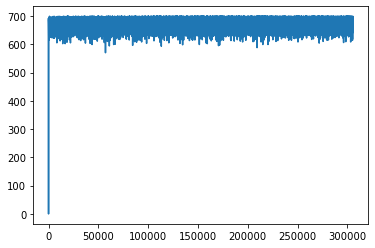

In [16]:
# overscan left and right columns
sky_flat[0].data[:100, 2150:]
imdata = sky_flat[0].data
overscan = (imdata < 700)
row, col = np.where(overscan)
plt.plot(imdata[overscan])

In [17]:
vmin, vmax = zscale.get_limits(imdata)

In [18]:
left = np.where(col < 100)
right = np.where(col > 2100)

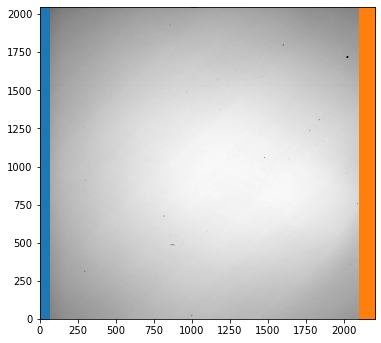

In [19]:
plt.figure(figsize=(6, 6))
plt.imshow(np.flip(imdata, axis=0), cmap='gray', vmin=vmin, vmax=vmax, origin='lower')
plt.scatter(col[left], row[left], s=1)
plt.scatter(col[right], row[right], s=1)
# plt.colorbar()

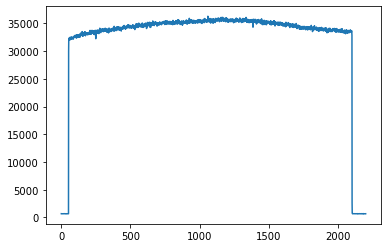

In [20]:
plt.plot(imdata[12, :])

In [21]:
# left and right overscan
show_imstat(imdata[row[left], col[left]])
show_imstat(imdata[row[right], col[right]])

Mean: 669.8333702862 Std: 9.618696947455222 Median: 670.0 RMS: 218.77756650840334 Min: 0 Max: 699
Mean: 672.2550246098166 Std: 9.11865206730075 Median: 672.0 RMS: 214.45976195339804 Min: 588 Max: 699


(672.2550246098166, 9.11865206730075, 672.0)

In [22]:
# where is the rightmost column of left overscan, and leftmost column of right overscan region
print(max(col[left]), min(col[right]))

52 2103


In [23]:
from astropy.modeling import models, fitting, polynomial

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


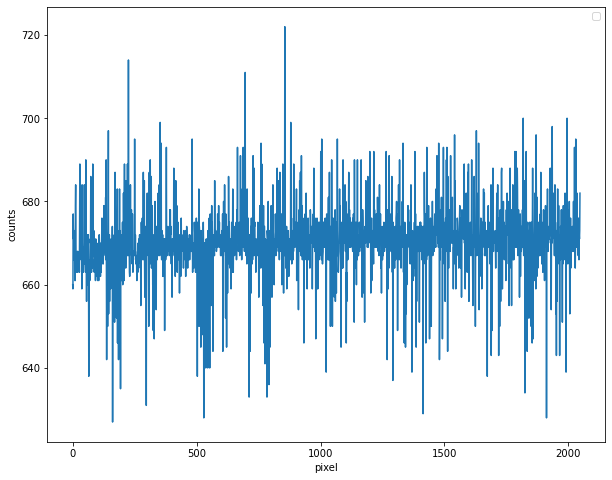

In [24]:
plt.figure(figsize=(10, 8))
plt.plot(imdata[:, 50])
# plt.plot(imdata[row[right], col[right]], ',', label="right overscan")
plt.xlabel("pixel")
plt.ylabel("counts")
plt.legend()

# Fitting a polymonial to the overscan region
Different properties of the polynomials. 
1. Legendre polynomial ($P_l$):
   - based on cosines
   - mutually orthogonal with different orders ($l \neq k$) within the same basis within interval [-1, 1]
   - typically use Rodrigues formula to construct
2. Chebychev polynomial ($T_n, U_n$):
   - Similar to Legendre, but has two kinds
   - each kind is mutually orthogonal with different orders to the weight function $(1-x^2)^{-1/2}$ within interval [-1, 1]
   - constructed with cos and sin with order n
3. Hermite polynomial 
   - based on exponential ($e^{-x^2}$)
   - mutually orthogonal with different orders to the weight function $e^{-x^2}$ within interval [$-\infty, \infty$]

Comparing these three functions, Legendre polynomial is stiffest, i.e. the slope of the curve is highest. Therefore, changing the orders $l$ will influence the result more significantly. Hermite polynomial is the smoothest. Chebychev is in the middle. However, in general, the fitting of these three functions are not very obvious in our example. 

In [25]:
col_num = -5

In [26]:
fit_poly = fitting.LevMarLSQFitter()

poly = polynomial.Polynomial1D(degree=3)
poly_overscan = fit_poly(poly, np.arange(0, imdata.shape[0]), imdata[:, col[left][col_num]])

cheb = polynomial.Chebyshev1D(degree=3)
cheb_overscan = fit_poly(cheb, np.arange(0, imdata.shape[0]), imdata[:, col[left][col_num]])

leg = polynomial.Legendre1D(degree=3)
leg_overscan = fit_poly(leg, np.arange(0, imdata.shape[0]), imdata[:, col[left][col_num]])

her = polynomial.Hermite1D(degree=3)
her_overscan = fit_poly(her, np.arange(0, imdata.shape[0]), imdata[:, col[left][col_num]])

In [27]:
col_num = -1

residual sum:  
poly:  151.99999999991496 
cheb:  152.0000000000747 
leg:  152.00000000056582 
her:  151.9999999997392


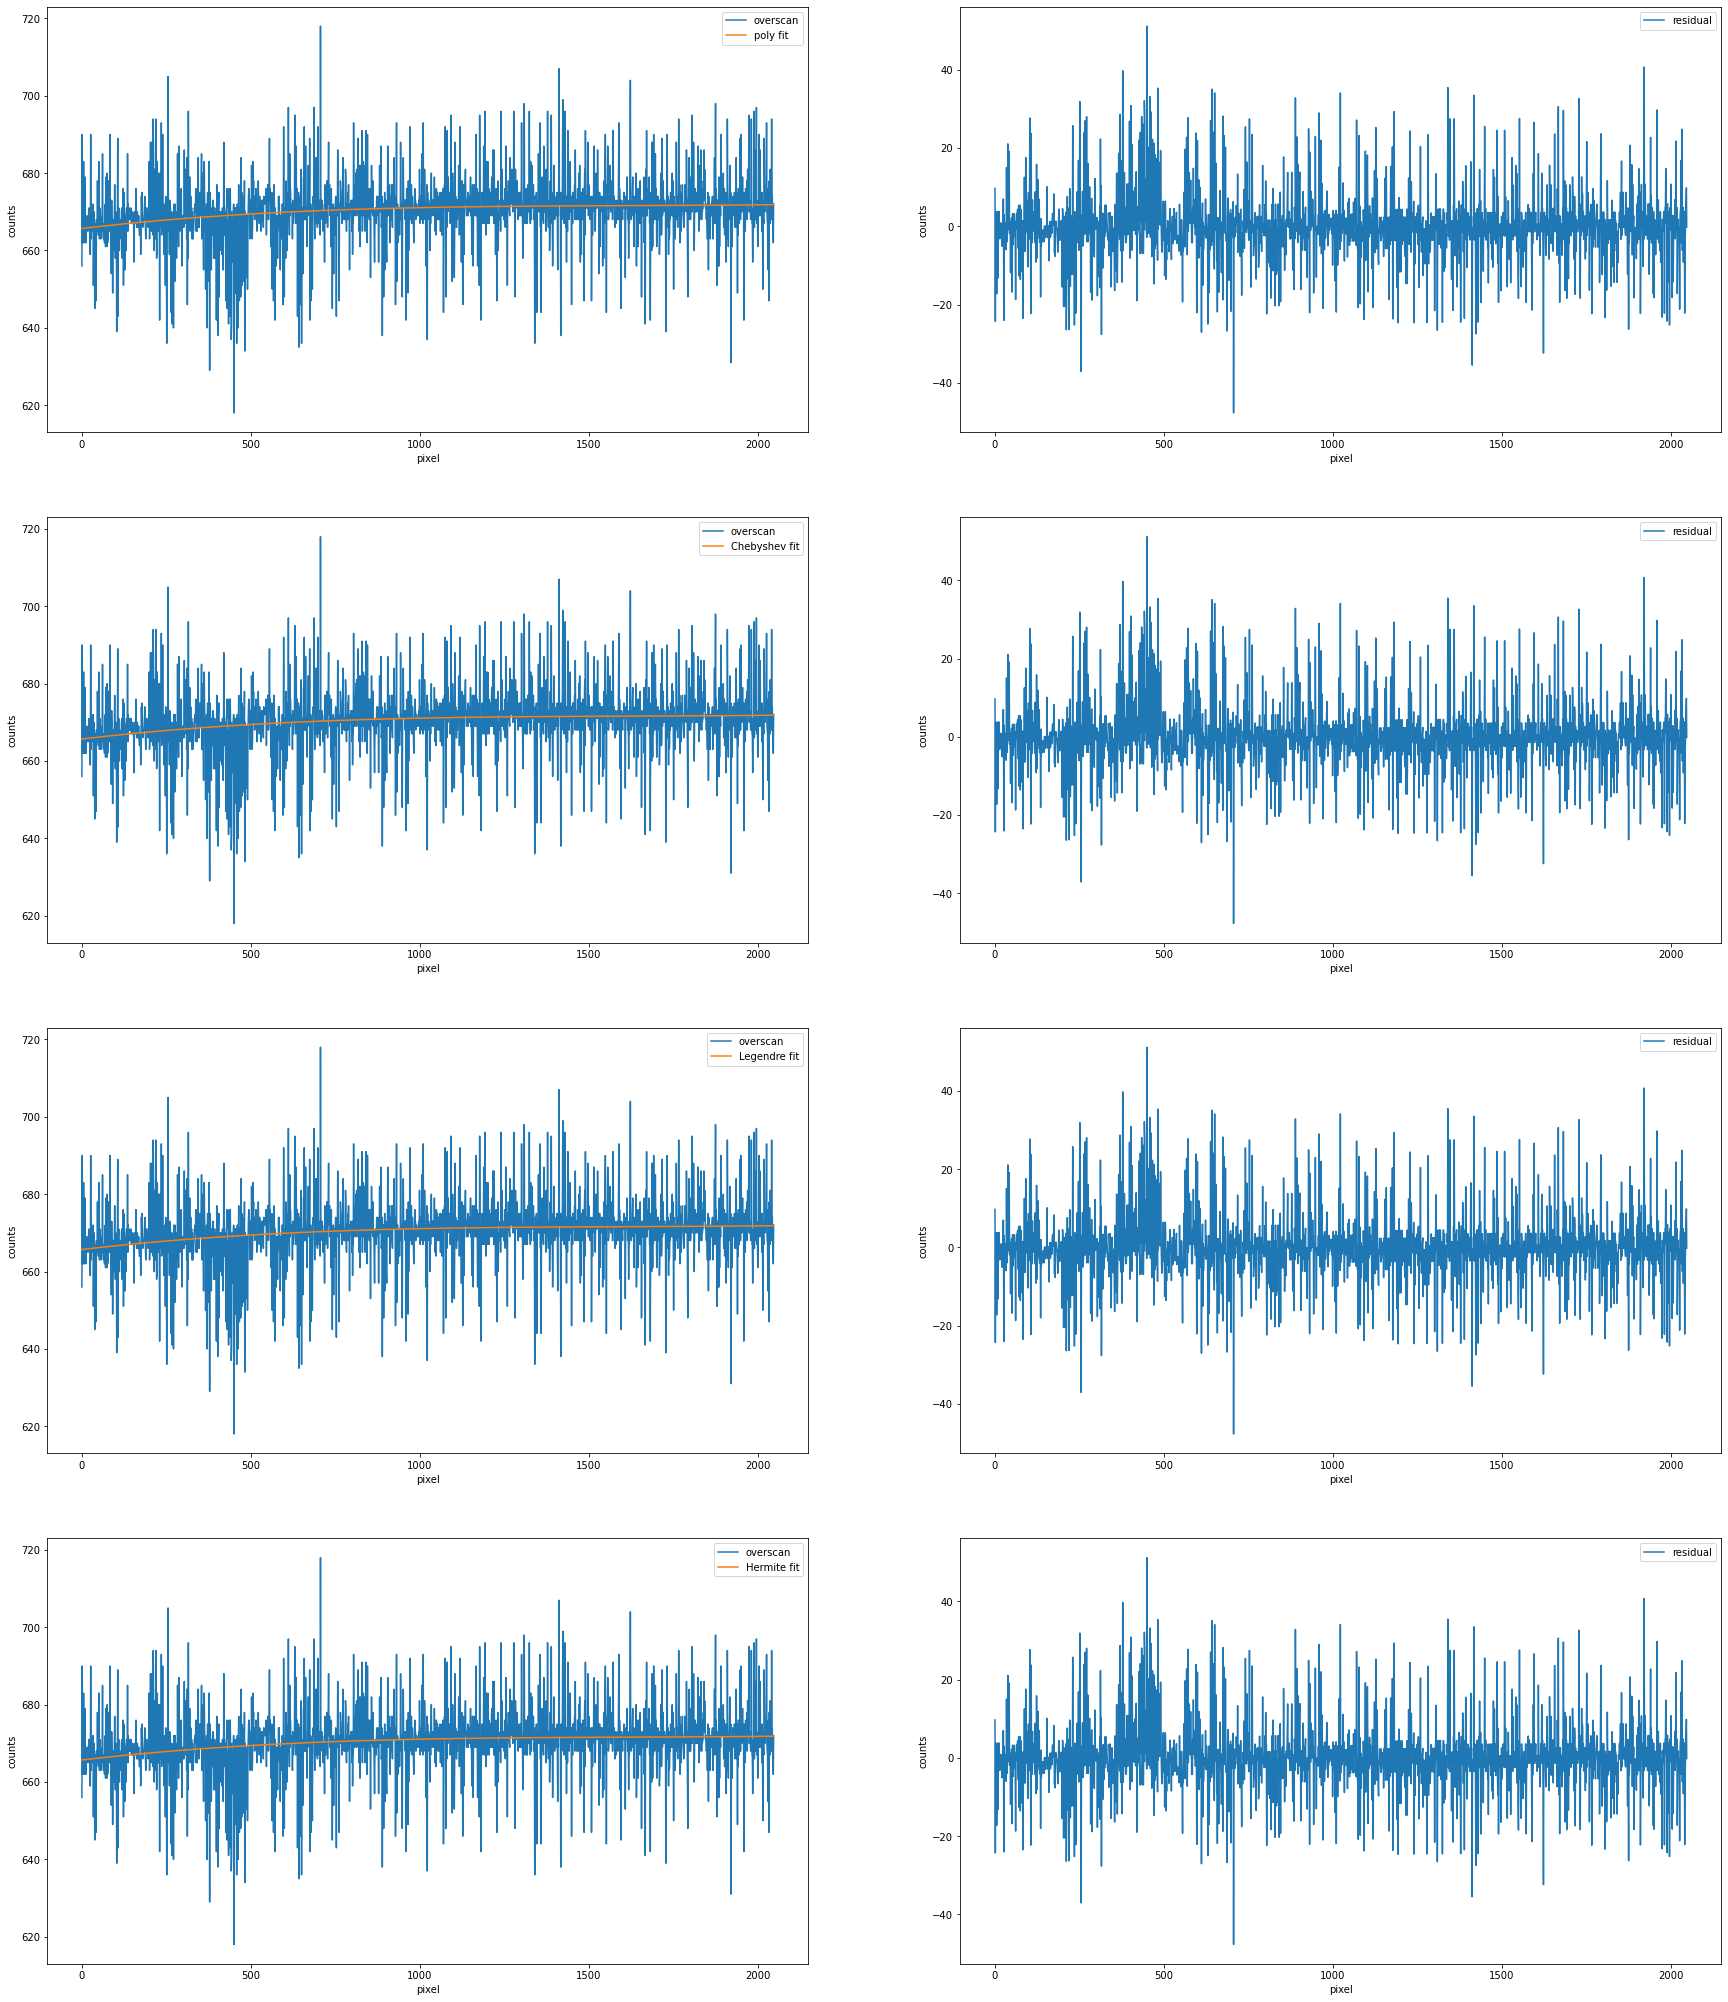

In [28]:
fig, ax = plt.subplots(4, 2, figsize=(30, 36))
ax[0][0].plot(imdata[:, col[left][col_num]], label="overscan")
# plt.plot(imdata[row[right], col[right]], ',', label="right overscan")
poly_fit_data = poly_overscan(np.arange(0, imdata.shape[0]))
ax[0][0].plot(np.arange(0, imdata.shape[0]), poly_fit_data, label="poly fit")
ax[0][1].plot(np.arange(0, imdata.shape[0]), poly_fit_data - imdata[:, col[left][col_num]], label="residual")
ax[0][0].set_xlabel("pixel")
ax[0][0].set_ylabel("counts")
ax[0][1].set_xlabel("pixel")
ax[0][1].set_ylabel("counts")
ax[0][0].legend()
ax[0][1].legend()

ax[1][0].plot(imdata[:, col[left][col_num]], label="overscan")
# plt.plot(imdata[row[right], col[right]], ',', label="right overscan")
cheb_fit_data = cheb_overscan(np.arange(0, imdata.shape[0]))
ax[1][0].plot(np.arange(0, imdata.shape[0]), cheb_fit_data, label="Chebyshev fit")
ax[1][1].plot(np.arange(0, imdata.shape[0]), cheb_fit_data - imdata[:, col[left][col_num]], label="residual")
ax[1][0].set_xlabel("pixel")
ax[1][0].set_ylabel("counts")
ax[1][1].set_xlabel("pixel")
ax[1][1].set_ylabel("counts")
ax[1][0].legend()
ax[1][1].legend()

ax[2][0].plot(imdata[:, col[left][col_num]], label="overscan")
# plt.plot(imdata[row[right], col[right]], ',', label="right overscan")
leg_fit_data = leg_overscan(np.arange(0, imdata.shape[0]))
ax[2][0].plot(np.arange(0, imdata.shape[0]), leg_fit_data, label="Legendre fit")
ax[2][1].plot(np.arange(0, imdata.shape[0]), leg_fit_data - imdata[:, col[left][col_num]], label="residual")
ax[2][0].set_xlabel("pixel")
ax[2][0].set_ylabel("counts")
ax[2][1].set_xlabel("pixel")
ax[2][1].set_ylabel("counts")
ax[2][0].legend()
ax[2][1].legend()

ax[3][0].plot(imdata[:, col[left][col_num]], label="overscan")
# plt.plot(imdata[row[right], col[right]], ',', label="right overscan")
her_fit_data = her_overscan(np.arange(0, imdata.shape[0]))
ax[3][0].plot(np.arange(0, imdata.shape[0]), her_fit_data , label="Hermite fit")
ax[3][1].plot(np.arange(0, imdata.shape[0]), her_fit_data - imdata[:, col[left][col_num]], label="residual")
ax[3][0].set_xlabel("pixel")
ax[3][0].set_ylabel("counts")
ax[3][1].set_xlabel("pixel")
ax[3][1].set_ylabel("counts")
ax[3][0].legend()
ax[3][1].legend()

print("residual sum: ",
      "\npoly: ", abs(np.sum(poly_fit_data - imdata[:, col[left][col_num]])),
      "\ncheb: ", abs(np.sum(cheb_fit_data - imdata[:, col[left][col_num]])),
      "\nleg: ", abs(np.sum(leg_fit_data - imdata[:, col[left][col_num]])),
      "\nher: ", abs(np.sum(her_fit_data - imdata[:, col[left][col_num]]))
      )


# Comments on overscan fitting
A third order is sufficient to achieve a low enough residual. I chose to use Chebyshev polynomials for all the overscan trim. 

# Overscan substraction

In [29]:
import ccdproc as ccdp
import astropy.units as u

In [30]:
ccd_im = ccdp.CCDData(imdata, unit=u.adu)
ccd_z = ccdp.subtract_overscan(ccd_im, overscan=ccd_im[:, 2120:2170], model=cheb_overscan)

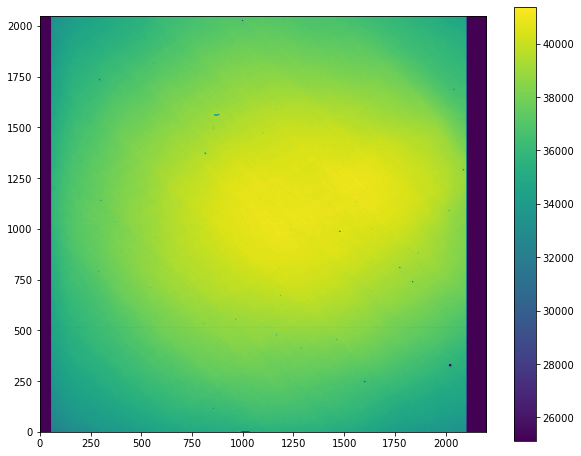

In [31]:
plt.figure(figsize=(10, 8))
vmin, vmax = zscale.get_limits(imdata)
plt.imshow(imdata, origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()

# Overscan trim

In [32]:
ccd_zt = ccdp.trim_image(ccd_z[:, 55:2100])

In [33]:
ccd_zt.shape

(2048, 2045)

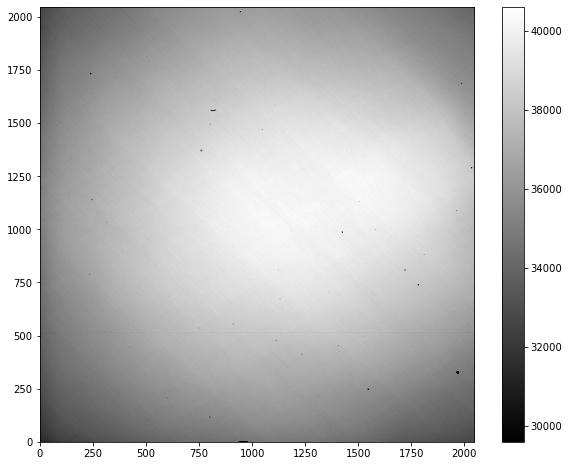

In [34]:
plt.figure(figsize=(10, 8))
vmin, vmax = zscale.get_limits(ccd_zt)
plt.imshow(ccd_zt, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
plt.colorbar()

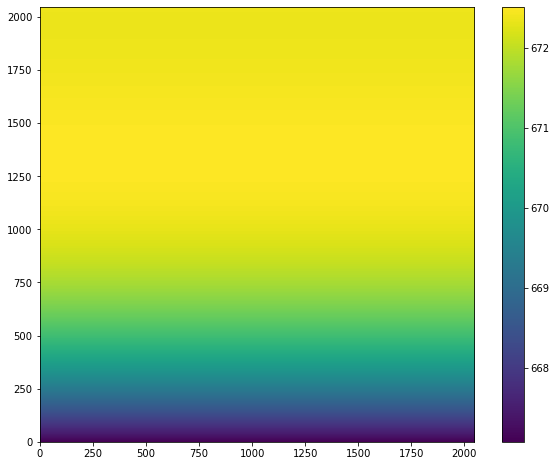

In [35]:
plt.figure(figsize=(10, 8))
res = abs(ccd_zt.data - imdata[:, 55:2100])
vmin, vmax = zscale.get_limits(res)
plt.imshow(res, origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()

# Trim overscan from all images

In [105]:
import os

In [150]:
# not significant difference
# Bias image 
# a93 - 111 
# bias_file = [f"./Imaging/a{i:0>3}.fits" for i in range(95, 112)]
for i in range(250):
    image = f"../Imaging/a{i:0>3}.fits"
    if not os.path.exists(image):
        continue
#     hdu = fits.open(image)
    ccd_data = ccdp.CCDData.read(image, unit='adu')
    try:
        ccd_zt = overscan_subs_trim(ccd_data, cheb_overscan)
    except Exception as err:
        print(f"Cannot process {image}, reason: {err}")
        continue
    if 93 < i < 111:
        ccd_zt.write(f"../reduction/bias/a{i:0>3}_zt.fits", overwrite=True)
    else:
        ccd_zt.write(f"../reduction/a{i:0>3}_zt.fits", overwrite=True)
#     hdu.close()

/d/users/brook/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/d/users/brook/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Cannot process ../Imaging/a063.fits, reason: SVD did not converge in Linear Least Squares

Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.


# Combine all trimmed bias images

In [123]:
bias_zt_files = [f"../reduction/bias/a{i:0>3}_zt.fits" for i in range(93, 112)]

In [124]:
sample_bias = fits.open(bias_zt_files[4])

In [125]:
combined_bias = ccdp.combine(bias_zt_files,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func=np.ma.std,
                             mem_limit=350e6
                            )

INFO: splitting each image into 11 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


In [40]:
combined_bias.write(f"../reduction/bias/masterbias.fits", overwrite=True)

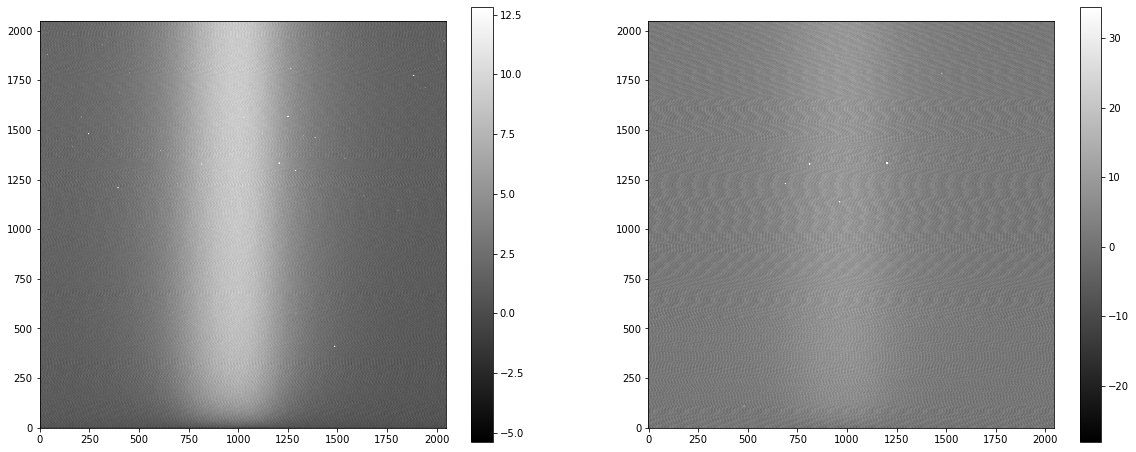

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
plot_zscale_image(combined_bias.data, ax[0], 'gray')
plot_zscale_image(sample_bias[0].data, ax[1], 'gray')

In [127]:
show_imstat(combined_bias.data)
show_imstat(sample_bias[0].data)

Mean: 3.487643052394105 Std: 3.11412869064534 Median: 3.0778443096612174 RMS: 4.675623120271065 Min: -10.962168044158423 Max: 363.2919278906846
Mean: 3.47550143738515 Std: 9.12491919533952 Median: 3.4465059822362036 RMS: 9.76438736238695 Min: -74.69980494261335 Max: 3094.4698437566335


(3.47550143738515, 9.12491919533952, 3.4465059822362036)

# Question 7
From the plot, we can see that the masterbias has a pattern, where central
part is bright, and on the side it is dark. The pattern of the bias does not change very significantly. The bias changed less fewer 10 ADU, while the overscan changed fewer than 40 ADU throughout the night. From the comparison above, we can see that the standard deviation is reduced by about 3 times for the combined master bias image. So noise will decrease significantly, SNR will increase. 

# Work on dark 

First trim all dark images, (and subtract the bias?)

In [58]:
for i in range(1, 16):
    dark = f"../Imaging/d{i:0>3}.fits"
    hdu = fits.open(dark)
    print(hdu[0].header['EXPTIME'])
    hdu.close()

2
2
2
2
2
5
5
5
5
5
300
300
300
300
300


We can see the exposure time for each dark image is different. Since we know that dark current usually scales up linearly with time. Therefore, we divide all the dark images with their exposure time to scale down to 1 sec master dark standard image, which we can scale up later to the expected time. We used long exposure ones (d011-d015) to capture the dark current, and then remember to scale it down/up to the science image exposure time.

In [129]:
# Trim overscan
for i in range(1, 16):
    dark = f"../Imaging/d{i:0>3}.fits"
#     hdu = fits.open(dark)
    ccd_data = ccdp.CCDData.read(dark, unit='adu')
    ccd_zt = overscan_subs_trim(ccd_data, cheb_overscan)
    ccd_zt.write(f"../reduction/dark/d{i:0>3}_zt.fits", overwrite=True)
#     hdu.close()

In [130]:
combined_bias = ccdp.CCDData.read(f"../reduction/bias/masterbias.fits")

In [131]:
# Substract bias from all dark
for i in range(1, 16):
    dark_zt = ccdp.CCDData.read(f"../reduction/dark/d{i:0>3}_zt.fits")
    ccd_b = ccdp.subtract_bias(dark_zt, combined_bias)
    ccd_b.write(f"../reduction/dark/d{i:0>3}_b.fits", overwrite=True)
    hdu.close()

Text(0.5, 1.0, 'zero-trimed, bias substracted dark')

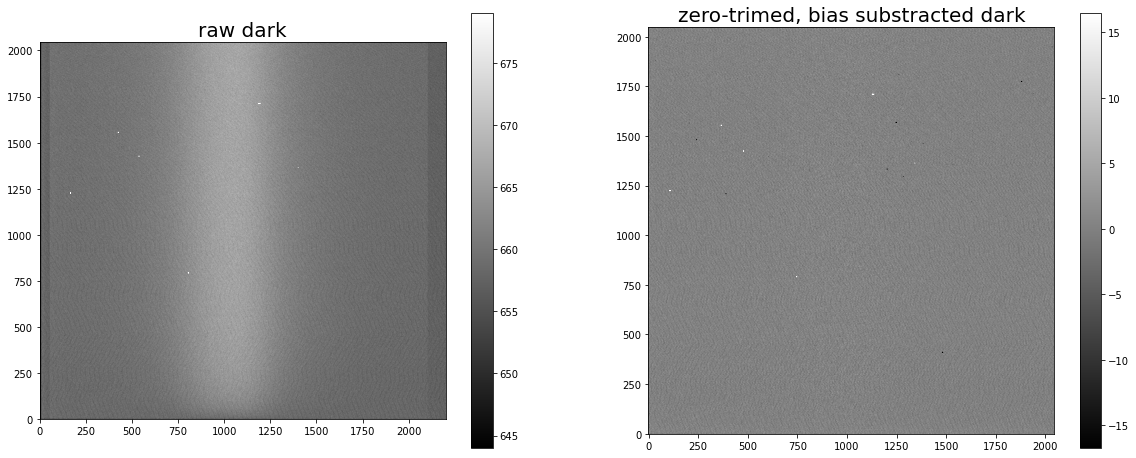

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
with fits.open(f"../Imaging/d001.fits") as sample_dark:
    plot_zscale_image(sample_dark[0].data, ax[0], 'gray')
ax[0].set_title("raw dark", fontsize=20)
with fits.open(f"../reduction/dark/d001_b.fits") as sample_dark:
    plot_zscale_image(sample_dark[0].data, ax[1], 'gray')
ax[1].set_title("zero-trimed, bias substracted dark", fontsize=20)
# all feature removed in dark images

In [135]:
# only use the longest exposure for master dark
for i in range(11, 16):
    dark_b = ccdp.CCDData.read(f"../reduction/dark/d{i:0>3}_b.fits")
    dark_b.data /= dark_b.header["EXPTIME"]
    dark_b.write(f"../reduction/dark/d{i:0>3}_b_scaled.fits", overwrite=True)

In [144]:
dark_b_files = [f"../reduction/dark/d{i:0>3}_b.fits" for i in range(11, 16)]

In [145]:
combined_dark_avg = ccdp.combine(dark_b_files, method='average')
combined_dark_med = ccdp.combine(dark_b_files, method='median')

Text(0.5, 1.0, 'simple median')

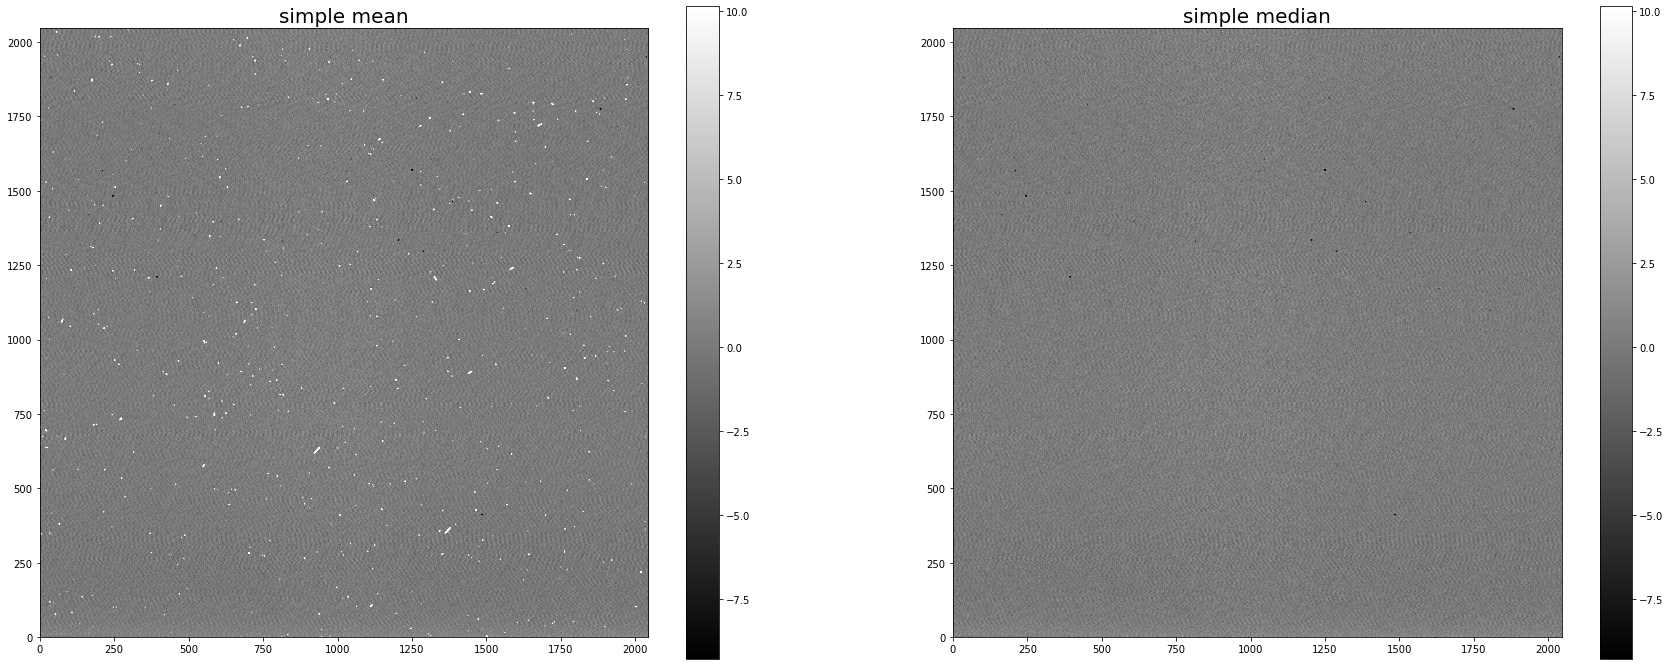

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(30, 12))
vmin, vmax = zscale.get_limits(combined_dark_avg.data)
plot_zscale_image(combined_dark_avg.data, axs[0], 'gray', vmin, vmax)
axs[0].set_title("simple mean", fontsize=20)
plot_zscale_image(combined_dark_med.data, axs[1], 'gray', vmin, vmax)
axs[1].set_title("simple median", fontsize=20)

In [147]:
combined_dark_clip_avg = ccdp.combine(dark_b_files,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                             sigma_clip_func=np.ma.mean, sigma_clip_dev_func=np.ma.std,
                             mem_limit=350e6
                            )

combined_dark_clip_med = ccdp.combine(dark_b_files,
                             method='median',
                             sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                             sigma_clip_func=np.ma.mean, sigma_clip_dev_func=np.ma.std,
                             mem_limit=350e6
                            )

INFO: splitting each image into 3 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]
INFO: splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


Text(0.5, 1.0, 'median with 3 sigma clipping')

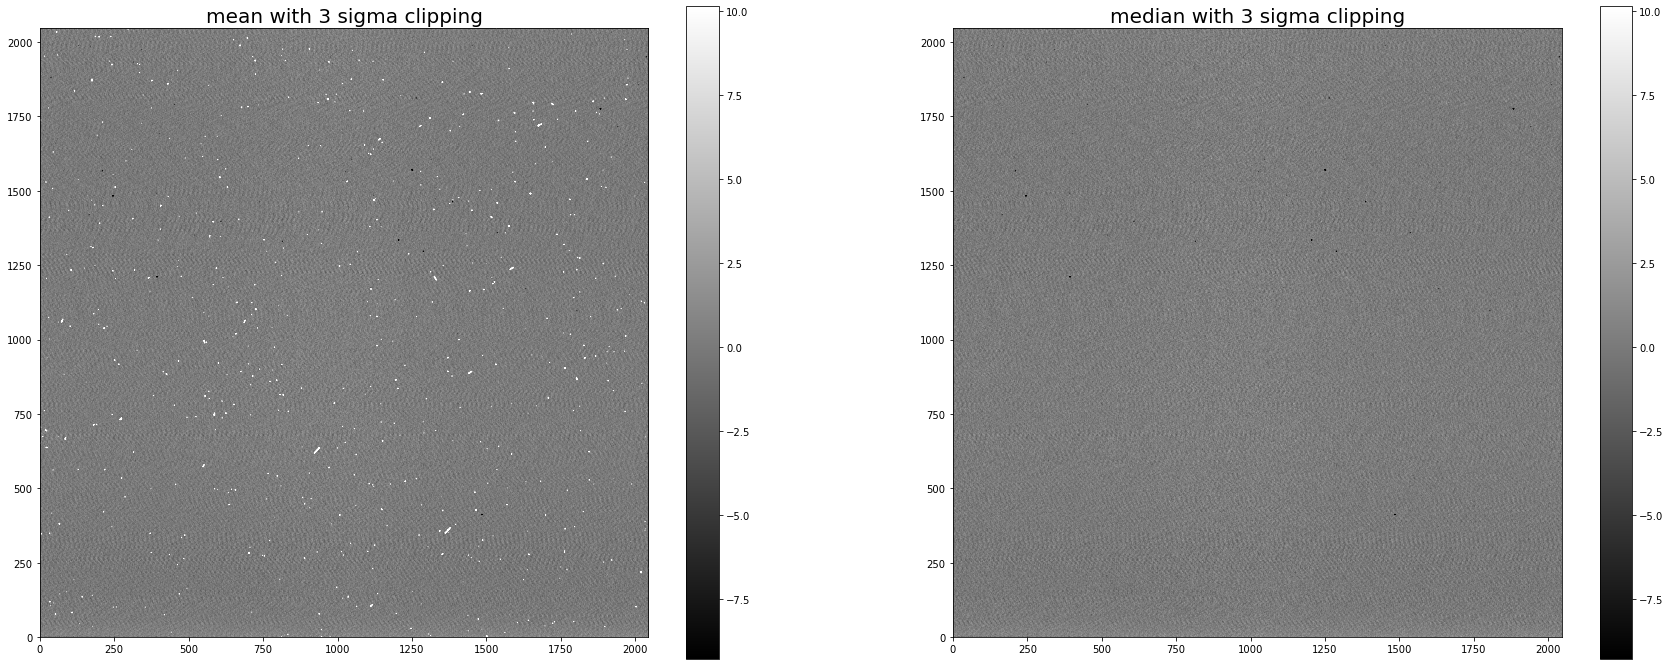

In [148]:
fig, axs = plt.subplots(1, 2, figsize=(30, 12))
vmin, vmax = zscale.get_limits(combined_dark_clip_avg.data)
plot_zscale_image(combined_dark_clip_avg.data, axs[0], 'gray', vmin, vmax)
axs[0].set_title("mean with 3 sigma clipping", fontsize=20)
plot_zscale_image(combined_dark_clip_med.data, axs[1], 'gray', vmin, vmax)
axs[1].set_title("median with 3 sigma clipping", fontsize=20)

In [149]:
combined_dark_avg.write("../reduction/dark/masterdark_avg.fits", overwrite=True)
combined_dark_med.write("../reduction/dark/masterdark_med.fits", overwrite=True)
combined_dark_clip_avg.write("../reduction/dark/masterdark_clip_avg.fits", overwrite=True)
combined_dark_clip_med.write("../reduction/dark/masterdark_clip_med.fits", overwrite=True)

# Master dark comments
A plain median method (right figure) can drop most of the hot pixels, where dark current is quite high. There are still some hot pixels 
in the plain average method (left figure). After adding sigma clip, 
we can see that both mean and median can drop the hot pixels, and the master dark with median method in the right figure looks 
more blur, i.e. smoother than the one with average method in the left figure. 

In [142]:
print("simple average:")
show_imstat(combined_dark_avg.data)
print("simple median:")
show_imstat(combined_dark_med.data)
print("Mean with 3 sigma clipping:")
show_imstat(combined_dark_clip_avg.data)
print("Median with 3 sigma clipping:")
show_imstat(combined_dark_clip_med.data)

simple average:
Mean: 0.00032647090343924993 Std: 0.015078430457803958 Median: 0.000142935972252983 RMS: 0.015081964338958717 Min: -1.1970103333284892 Max: 11.740153338963275
simple median:
Mean: 0.00026717101170501637 Std: 0.009552655798810811 Median: 0.00021423395941413107 RMS: 0.009556391220541843 Min: -1.194079173573783 Max: 0.08569996466553542
Mean with 3 sigma clipping:
Mean: 0.00032647090343924993 Std: 0.015078430457803958 Median: 0.000142935972252983 RMS: 0.015081964338958717 Min: -1.1970103333284892 Max: 11.740153338963275
Median with 3 sigma clipping:
Mean: 0.00026717101170501637 Std: 0.009552655798810811 Median: 0.00021423395941413107 RMS: 0.009556391220541843 Min: -1.194079173573783 Max: 0.08569996466553542


(0.00026717101170501637, 0.009552655798810811, 0.00021423395941413107)

In [143]:
with fits.open(f"../reduction/dark/d006_b.fits") as sample_dark:
    show_imstat(sample_dark[0].data)

Mean: 0.14469417923047312 Std: 4.8510062128827 Median: 0.15620174338972137 RMS: 4.853163677739474 Min: -357.4615472113846 Max: 2292.2951115295864


From RMS and standard deviation, we can see that the sigma clipping does not help the result significantly, this is likely due to that there is no too hot pixels, i.e. too different from mean or cosmic rays. Moreover, the mean of each method is much lower then RMS or std. It is not necessary to substract the dark current from images, as more noise is higher than signal. This can be due to the camera in WIRO is N2 cooled, so dark current is not a big issue as the temperature is quite low.